In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data/002230.csv',encoding="gbk")

In [3]:
data.set_index('日期',inplace = True)

In [4]:
data.index = pd.to_datetime(data.index) 

In [5]:
data.sort_index(inplace=True)


In [6]:
data=data[~data['收盘价'].isin([0])]

In [7]:
data.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,
2008-05-12,'002230,N 讯 飞,30.31,31.17,28.21,28.21,12.66,17.65,139.4155,84.9465,18212540,541669795.9,3248201460,649846400
2008-05-13,'002230,科大讯飞,33.34,33.34,30.41,30.45,30.31,3.03,9.9967,23.3126,4998231,159771423.4,3572914440,714809600
2008-05-14,'002230,科大讯飞,33.95,34.98,32.30,34.20,33.34,0.61,1.8296,22.9577,4922130,164265608.9,3638285700,727888000
2008-05-15,'002230,科大讯飞,34.00,35.90,33.45,33.45,33.95,0.05,0.1473,21.6225,4635873,160713642.4,3643644000,728960000
2008-05-16,'002230,科大讯飞,32.96,35.29,32.70,33.50,34.00,-1.04,-3.0588,16.2214,3477867,117697746.4,3532191360,706662400


In [8]:
data.rename(columns={'收盘价':'close'},inplace=True) 

In [9]:
data.head()

,股票代码,名称,close,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,
2008-05-12,'002230,N 讯 飞,30.31,31.17,28.21,28.21,12.66,17.65,139.4155,84.9465,18212540,541669795.9,3248201460,649846400
2008-05-13,'002230,科大讯飞,33.34,33.34,30.41,30.45,30.31,3.03,9.9967,23.3126,4998231,159771423.4,3572914440,714809600
2008-05-14,'002230,科大讯飞,33.95,34.98,32.30,34.20,33.34,0.61,1.8296,22.9577,4922130,164265608.9,3638285700,727888000
2008-05-15,'002230,科大讯飞,34.00,35.90,33.45,33.45,33.95,0.05,0.1473,21.6225,4635873,160713642.4,3643644000,728960000
2008-05-16,'002230,科大讯飞,32.96,35.29,32.70,33.50,34.00,-1.04,-3.0588,16.2214,3477867,117697746.4,3532191360,706662400


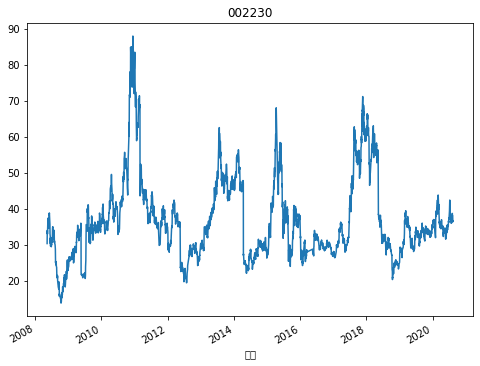

In [10]:
 data['close'].plot(figsize = (8,6),title = '002230')

# 特征工程处理

In [11]:
for i in range(1, 21, 1):
    data['close - ' + str(i) + 'd'] = data['close'].shift(i)

In [12]:
data_20d = data[[x for x in data.columns if 'close' in x]].iloc[20:]

In [13]:
data_20d = data_20d.iloc[:,::-1]                #转换特征的顺序；

In [14]:
data_20d

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
日期,,,,,,,,,,,,,,,,,,,,,
2008-06-10,30.31,33.34,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,...,34.50,35.00,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88
2008-06-11,33.34,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,...,35.00,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90
2008-06-12,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,...,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60
2008-06-13,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,35.00,...,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60,32.99
2008-06-16,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,35.00,36.19,...,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60,32.99,32.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,41.13,41.58,39.90,38.80,37.03,37.24,37.77,37.99,38.02,37.23,...,35.95,36.00,37.16,36.23,36.62,37.75,37.47,37.42,38.70,37.99
2020-08-10,41.58,39.90,38.80,37.03,37.24,37.77,37.99,38.02,37.23,35.95,...,36.00,37.16,36.23,36.62,37.75,37.47,37.42,38.70,37.99,38.06
2020-08-11,39.90,38.80,37.03,37.24,37.77,37.99,38.02,37.23,35.95,35.95,...,37.16,36.23,36.62,37.75,37.47,37.42,38.70,37.99,38.06,36.77


# 测试集表现

In [15]:
from sklearn import svm

In [16]:
clf = svm.SVR(kernel='linear')


生成训练集和子集

In [17]:
df1=data_20d.loc[:'2018-07-01']

In [18]:
df1

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
日期,,,,,,,,,,,,,,,,,,,,,
2008-06-10,30.31,33.34,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,...,34.50,35.00,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88
2008-06-11,33.34,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,...,35.00,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90
2008-06-12,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,...,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60
2008-06-13,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,35.00,...,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60,32.99
2008-06-16,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,35.00,36.19,...,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60,32.99,32.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,36.41,36.68,36.56,34.88,36.21,37.65,37.71,38.19,37.90,37.14,...,36.32,36.79,35.63,35.61,35.51,31.96,32.00,30.51,30.85,30.40
2018-06-26,36.68,36.56,34.88,36.21,37.65,37.71,38.19,37.90,37.14,36.47,...,36.79,35.63,35.61,35.51,31.96,32.00,30.51,30.85,30.40,31.30
2018-06-27,36.56,34.88,36.21,37.65,37.71,38.19,37.90,37.14,36.47,36.32,...,35.63,35.61,35.51,31.96,32.00,30.51,30.85,30.40,31.30,30.77


In [19]:
features_train = df1
features_train

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
日期,,,,,,,,,,,,,,,,,,,,,
2008-06-10,30.31,33.34,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,...,34.50,35.00,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88
2008-06-11,33.34,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,...,35.00,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90
2008-06-12,33.95,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,...,36.19,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60
2008-06-13,34.00,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,35.00,...,36.69,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60,32.99
2008-06-16,32.96,36.26,36.50,36.85,35.68,37.40,36.18,34.50,35.00,36.19,...,36.26,38.68,38.26,38.50,38.80,36.88,35.90,35.60,32.99,32.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,36.41,36.68,36.56,34.88,36.21,37.65,37.71,38.19,37.90,37.14,...,36.32,36.79,35.63,35.61,35.51,31.96,32.00,30.51,30.85,30.40
2018-06-26,36.68,36.56,34.88,36.21,37.65,37.71,38.19,37.90,37.14,36.47,...,36.79,35.63,35.61,35.51,31.96,32.00,30.51,30.85,30.40,31.30
2018-06-27,36.56,34.88,36.21,37.65,37.71,38.19,37.90,37.14,36.47,36.32,...,35.63,35.61,35.51,31.96,32.00,30.51,30.85,30.40,31.30,30.77


In [20]:
labels_train = data_20d['close'].shift(-1)[:'2018-07-01']   #下一天的收盘价就是前一天的标签；
labels_train

日期
2008-06-10    35.90
2008-06-11    35.60
2008-06-12    32.99
2008-06-13    32.20
2008-06-16    30.30
              ...  
2018-06-25    31.30
2018-06-26    30.77
2018-06-27    30.37
2018-06-28    32.07
2018-06-29    31.88
Name: close, Length: 2359, dtype: float64

In [21]:
features_test = data_20d['2018-07-01':]
features_test

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
日期,,,,,,,,,,,,,,,,,,,,,
2018-07-02,37.65,37.71,38.19,37.90,37.14,36.47,36.32,36.79,35.63,35.61,...,31.96,32.00,30.51,30.85,30.40,31.30,30.77,30.37,32.07,31.88
2018-07-03,37.71,38.19,37.90,37.14,36.47,36.32,36.79,35.63,35.61,35.51,...,32.00,30.51,30.85,30.40,31.30,30.77,30.37,32.07,31.88,32.85
2018-07-04,38.19,37.90,37.14,36.47,36.32,36.79,35.63,35.61,35.51,31.96,...,30.51,30.85,30.40,31.30,30.77,30.37,32.07,31.88,32.85,31.94
2018-07-05,37.90,37.14,36.47,36.32,36.79,35.63,35.61,35.51,31.96,32.00,...,30.85,30.40,31.30,30.77,30.37,32.07,31.88,32.85,31.94,30.85
2018-07-06,37.14,36.47,36.32,36.79,35.63,35.61,35.51,31.96,32.00,30.51,...,30.40,31.30,30.77,30.37,32.07,31.88,32.85,31.94,30.85,31.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,41.13,41.58,39.90,38.80,37.03,37.24,37.77,37.99,38.02,37.23,...,35.95,36.00,37.16,36.23,36.62,37.75,37.47,37.42,38.70,37.99
2020-08-10,41.58,39.90,38.80,37.03,37.24,37.77,37.99,38.02,37.23,35.95,...,36.00,37.16,36.23,36.62,37.75,37.47,37.42,38.70,37.99,38.06
2020-08-11,39.90,38.80,37.03,37.24,37.77,37.99,38.02,37.23,35.95,35.95,...,37.16,36.23,36.62,37.75,37.47,37.42,38.70,37.99,38.06,36.77


In [22]:
labels_test = data_20d['close'].shift(-1)['2018-07-01':]
labels_test.head()

日期
2018-07-02    32.85
2018-07-03    31.94
2018-07-04    30.85
2018-07-05    31.04
2018-07-06    31.95
Name: close, dtype: float64

模型训练

In [23]:
clf.fit(features_train, labels_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
predict = clf.predict(features_test)  

In [25]:
df = pd.DataFrame(labels_test)

In [26]:
df['predict'] = predict     #把前面预测的测试集的股价给添加到DataFrame中；
df = df.rename(columns = {'close': 'Next Close', 'predict':'Predict Next Close'})

In [27]:
df.head()

,Next Close,Predict Next Close
日期,,
2018-07-02,32.85,31.744041
2018-07-03,31.94,32.909472
2018-07-04,30.85,32.005577
2018-07-05,31.04,30.851206
2018-07-06,31.95,31.153226


In [28]:
current_close = data_20d[['close']].loc['2018-07-01':]
current_close.head()

,close
日期,
2018-07-02,31.88
2018-07-03,32.85
2018-07-04,31.94
2018-07-05,30.85
2018-07-06,31.04


In [29]:
next_open = data[['开盘价']].loc['2018-07-01':].shift(-1)    
next_open.head()

,开盘价
日期,
2018-07-02,31.80
2018-07-03,32.75
2018-07-04,31.79
2018-07-05,31.15
2018-07-06,31.49


In [30]:
df2 = pd.merge(df, current_close, left_index=True, right_index=True)
df2.head()

,Next Close,Predict Next Close,close
日期,,,
2018-07-02,32.85,31.744041,31.88
2018-07-03,31.94,32.909472,32.85
2018-07-04,30.85,32.005577,31.94
2018-07-05,31.04,30.851206,30.85
2018-07-06,31.95,31.153226,31.04


In [31]:
df3 = pd.merge(df2, next_open, left_index=True, right_index=True)

In [32]:
df3.head()

,Next Close,Predict Next Close,close,开盘价
日期,,,,
2018-07-02,32.85,31.744041,31.88,31.80
2018-07-03,31.94,32.909472,32.85,32.75
2018-07-04,30.85,32.005577,31.94,31.79
2018-07-05,31.04,30.851206,30.85,31.15
2018-07-06,31.95,31.153226,31.04,31.49


In [33]:
df3.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']

In [34]:
df3.head()

,Next Close,Predicted Next Close,Current Close,Next Open
日期,,,,
2018-07-02,32.85,31.744041,31.88,31.80
2018-07-03,31.94,32.909472,32.85,32.75
2018-07-04,30.85,32.005577,31.94,31.79
2018-07-05,31.04,30.851206,30.85,31.15
2018-07-06,31.95,31.153226,31.04,31.49


模型逻辑

In [35]:
df3['Signal'] = np.where(df3['Predicted Next Close'] > df3['Next Open'] ,1,0)

In [36]:
df3

,Next Close,Predicted Next Close,Current Close,Next Open,Signal
日期,,,,,
2018-07-02,32.85,31.744041,31.88,31.80,0
2018-07-03,31.94,32.909472,32.85,32.75,1
2018-07-04,30.85,32.005577,31.94,31.79,1
2018-07-05,31.04,30.851206,30.85,31.15,0
2018-07-06,31.95,31.153226,31.04,31.49,0
...,...,...,...,...,...
2020-08-07,38.06,37.916975,37.99,37.80,1
2020-08-10,36.77,38.169001,38.06,38.06,1
2020-08-11,36.37,36.853318,36.77,36.75,1


模型收益计算和可视化

In [37]:
df3['PL'] =  np.where(df3['Signal'] == 1,(df3['Next Close'] - df3['Next Open'])/df3['Next Open'],0)

In [38]:
df3['Strategy'] = (df3['PL'].shift(1)+1).cumprod()
df3['return'] = (df3['Next Close'].pct_change()+1).cumprod()

In [39]:
df3

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL,Strategy,return
日期,,,,,,,,
2018-07-02,32.85,31.744041,31.88,31.80,0,0.000000,NaN,NaN
2018-07-03,31.94,32.909472,32.85,32.75,1,-0.024733,1.000000,0.972298
2018-07-04,30.85,32.005577,31.94,31.79,1,-0.029569,0.975267,0.939117
2018-07-05,31.04,30.851206,30.85,31.15,0,0.000000,0.946429,0.944901
2018-07-06,31.95,31.153226,31.04,31.49,0,0.000000,0.946429,0.972603
...,...,...,...,...,...,...,...,...
2020-08-07,38.06,37.916975,37.99,37.80,1,0.006878,0.669730,1.158600
2020-08-10,36.77,38.169001,38.06,38.06,1,-0.033894,0.674337,1.119330
2020-08-11,36.37,36.853318,36.77,36.75,1,-0.010340,0.651481,1.107154


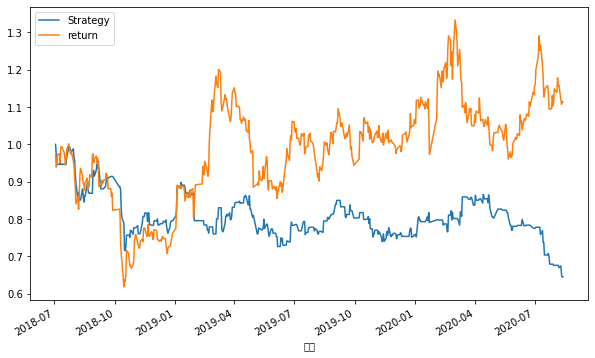

In [40]:
df3[['Strategy','return']].dropna().plot(figsize=(10, 6))

# 训练集数据

In [41]:
predict_train = clf.predict(features_train)

In [42]:
df_train = pd.DataFrame(labels_train)
df_train['predict'] = predict_train
df_train = df_train.rename(columns = {'close': 'Next Close', 'predict':'Predict Next Close'})

In [43]:
current_close_train = data_20d[['close']].loc[:'2018-07-01']
current_close_train.head()

,close
日期,
2008-06-10,36.88
2008-06-11,35.90
2008-06-12,35.60
2008-06-13,32.99
2008-06-16,32.20


In [44]:
next_open_train = data[['开盘价']].loc['2008-06-10':'2018-07-01'].shift(-1)
next_open_train.head()

,开盘价
日期,
2008-06-10,36.01
2008-06-11,35.43
2008-06-12,35.41
2008-06-13,32.61
2008-06-16,31.61


In [45]:
df1_train = pd.merge(df_train, current_close_train, left_index=True, right_index=True)
df2_train = pd.merge(df1_train, next_open_train, left_index=True, right_index=True)
df2_train.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']

In [46]:
df2_train ['Signal'] = np.where(df2_train ['Predicted Next Close'] > df2_train ['Next Open'] ,1,0)
df2_train ['PL'] =  np.where(df2_train ['Signal'] == 1,(df2_train ['Next Close'] - df2_train ['Next Open'])/df2_train ['Next Open'],0)

In [47]:
df2_train['Strategy'] = (df2_train['PL'].shift(1)+1).cumprod()
df2_train['return'] = (df2_train['Next Close'].pct_change()+1).cumprod()

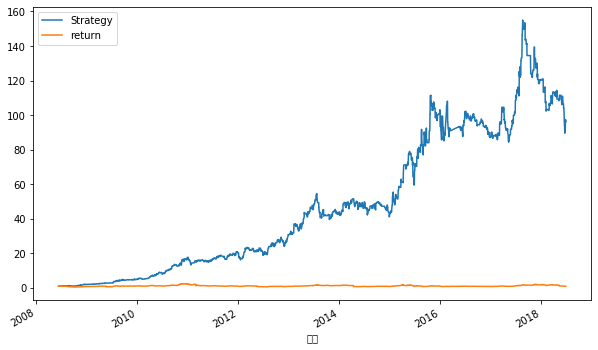

In [48]:
df2_train[['Strategy','return']].dropna().plot(figsize=(10, 6))